In [9]:
### Erying Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
file = "data/TableVIIIData.csv"   # Include all experimental data
#file = "data/TableVIIIDataExpEditted.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,NaN,NaN,1.87,6.39,9.66,12.3,23.3,5.60,53.4,NaN,NaN
1,20,1.26,NaN,1.54,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,NaN
2,25,2.53,1.36,2.64,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.25,5.06,12.20,33.00,50.40,66.2,137.0,24.40,NaN,8.00,NaN
4,35,8.89,13.50,9.94,23.80,NaN,76.20,NaN,NaN,36.00,NaN,NaN,0.701


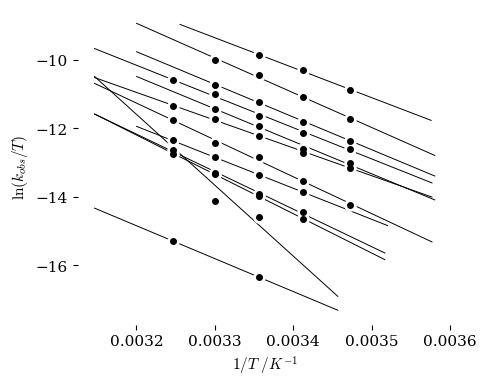

   Reactant         dH         dS
0         1  22.848404  -2.063939
1         2  41.165100  57.752433
2         3  21.801252  -5.360442
3         4  21.402989  -4.834129
4         5  18.856066 -11.437259
5         6  18.140153 -13.079137
6         7  18.979401  -9.607201
7         8  20.178587  -4.121037
8         9  16.134217 -21.075207
9        10  17.402400 -12.105235
10       11  18.003155 -17.063582
11       12  19.118032 -19.265529


In [18]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1


plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]
#columns = ["1","3","4","5","6","7","8","9","10","11","12"]   # omit 2 because it has bad data


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = 1/T
    y = np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
#    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)    # for plotting extrapolation to y-intecept
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -slope*8.314/1000/4.18
    S = (intercept - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
#              xlim=[0,0.0036],                  
#              ylim=[-20,3]
          
          )
    
#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)

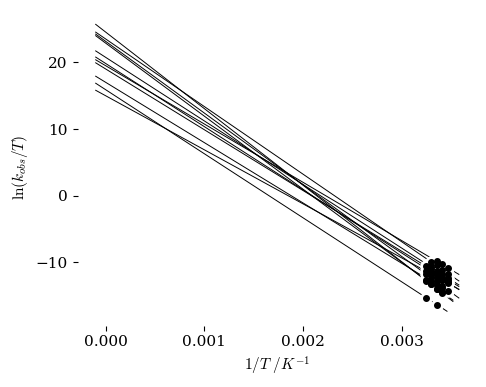

   Reactant         dH         dS
0         1  22.848404  -2.063939
1         3  21.801252  -5.360442
2         4  21.402989  -4.834129
3         5  18.856066 -11.437259
4         6  18.140153 -13.079137
5         7  18.979401  -9.607201
6         8  20.178587  -4.121037
7         9  16.134217 -21.075207
8        10  17.402400 -12.105235
9        11  18.003155 -17.063582
10       12  19.118032 -19.265529


In [ ]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1


plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
#columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]
columns = ["1","3","4","5","6","7","8","9","10","11","12"]   # omit 2 because it has bad data


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = 1/T
    y = np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)    # for plotting extrapolation to y-intecept
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -slope*8.314/1000/4.18
    S = (intercept - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
#              xlim=[0,0.0036],                  
#              ylim=[-20,3]
          
          )
    
#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)

In [4]:
## Authors Erying Plots

## When using editted data the first value for "1" is cut and the last value for "2" is cut.

### Erying Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableVIIIDataXtraPointsEditted.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,0.257,0.646,1.87,6.39,9.66,12.3,23.3,5.60,53.4,2.04,NaN
1,20,1.26,0.631,1.540,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,0.120
2,25,2.53,1.360,2.640,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.250,5.060,12.20,33.00,50.40,66.2,137.0,24.40,282.0,8.00,0.417
4,35,8.89,NaN,9.940,23.80,57.50,76.20,148.0,283.0,36.00,363.0,12.30,0.701


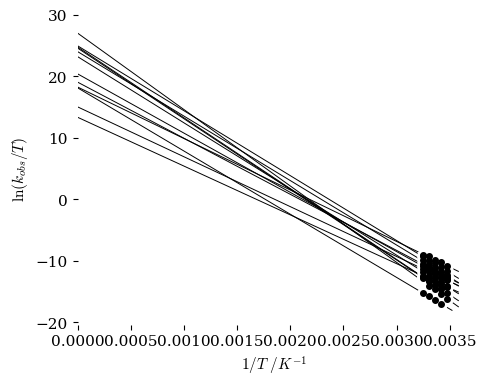

   Reactant         dH         dS
0         1  22.848404  -2.063939
1         2  24.714719   2.770758
2         3  22.908044  -1.705642
3         4  21.402989  -4.834129
4         5  19.158722 -10.403710
5         6  18.140153 -13.079137
6         7  20.854736  -3.203065
7         8  20.995654  -1.330812
8         9  16.134217 -21.075207
9        10  16.649109 -14.661943
10       11  15.784223 -24.439428
11       12  20.440862 -14.914375


In [7]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1



plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]


#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = 1/T
    y = np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -slope*8.314/1000/4.18
    S = (intercept - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
              xlim=[0,0.0037],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

#fig.savefig("plots/PlotsErying2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)

In [5]:
### Plotting Entropies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
#file = "TableVIIIData.csv"
file = "data/dS_data.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df

,Reactant,sum_sigma_plus,Edited dS,Exp dS,Author dS
0,1,0.22,-2.1,-2.1,1.6
1,2,0.43,2.8,57.8,4.4
2,3,0.37,-1.7,-5.4,2.7
3,4,0.11,-4.8,-4.8,-0.8
4,5,0.12,-10.4,-11.4,4.3
5,6,0.00,-13.1,-13.1,-2.6
6,7,-0.07,-3.2,-9.6,1.4
7,8,-0.31,-1.3,-4.1,-1.0
8,9,-0.78,-21.1,-21.1,-16.7
9,10,-0.62,-14.7,-12.1,-12.3


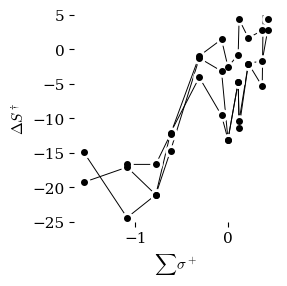

In [6]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

df.sort_values(by=("sum_sigma_plus"), inplace=True)  

x = df["sum_sigma_plus"]
y1 = df["Author dS"][1:12]
y2 = df["Exp dS"]
y3 = df["Edited dS"]
x1 = x[1:12]


plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

 



########################
### Plot the data    ###
########################
y = y3

ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

y = y2

ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

y = y1
x = x1
ax.plot(x,y, color='black', zorder=1, linewidth=0.7)
ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=16, color="black", zorder=3)

############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\Delta S^\dagger$", 
       xlabel=r"$\sum \sigma^+$",
#          xlim=[0,13],                  
          ylim=[-25,5]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsEntropy1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots



In [7]:
## better Erying?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv("data/TableVIIIDataXtraPointsEditted.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 

df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,0.257,0.646,1.87,6.39,9.66,12.3,23.3,5.60,53.4,2.04,NaN
1,20,1.26,0.631,1.540,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,0.120
2,25,2.53,1.360,2.640,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.250,5.060,12.20,33.00,50.40,66.2,137.0,24.40,282.0,8.00,0.417
4,35,8.89,NaN,9.940,23.80,57.50,76.20,148.0,283.0,36.00,363.0,12.30,0.701


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
#file = "data/TableVIIIData.csv"
file = "data/TableVIIIDataExpEditted.csv"


df = pd.read_csv(file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="pH", 
                 comment = "#") 


df

,Temp,1,2,3,4,5,6,7,8,9,10,11,12
0,15,NaN,NaN,NaN,1.87,6.39,9.66,12.3,23.3,5.60,53.4,NaN,NaN
1,20,1.26,NaN,1.54,3.90,9.88,15.50,21.8,44.5,8.82,99.2,2.79,NaN
2,25,2.53,1.36,2.64,7.88,19.50,26.40,39.2,86.3,14.70,153.0,4.64,0.238
3,30,4.93,2.25,5.06,12.20,33.00,50.40,66.2,137.0,24.40,NaN,8.00,NaN
4,35,8.89,NaN,9.94,23.80,NaN,76.20,NaN,NaN,36.00,NaN,NaN,0.701


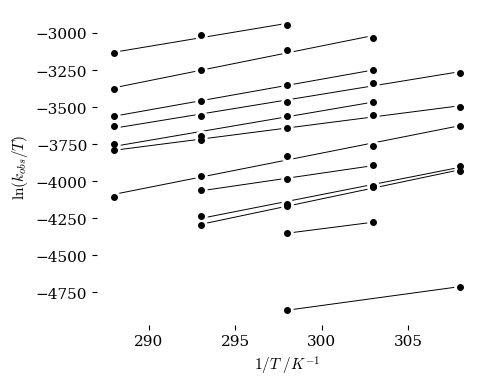

   Reactant         dH         dS
0         1  22.832990  -2.115243
1         2  17.485527 -21.276975
2         3  21.843660  -5.219295
3         4  21.372416  -4.936754
4         5  18.886312 -11.334886
5         6  18.154476 -13.031059
6         7  18.976926  -9.615578
7         8  20.144639  -4.235942
8         9  16.131423 -21.084585
9        10  17.369702 -12.216843
10       11  18.013713 -17.028149
11       12  19.118032 -19.265529


In [9]:
##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

kb = 1.380649E-23
h = 1.054572E-34
kappa = 1



plt.style.use("tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

pairs = []
columns = ["1","2","3","4","5","6","7","8","9","10","11","12"]


#df["H0"]=[0.06,-0.1,-0.25]  ### Values from DOI: 10.1021/ja01302a027


for c in columns:
    
    df2 = df[["Temp",c]]
    df3 = df2.dropna()
    
    T = df3["Temp"]+273
    x = T
    y = T*np.log((df3[c]/10000)/T)
    
     
    line = linregress(x,y)
    slope = line.slope
    r  =line.rvalue
    intercept = line.intercept
#    print(slope, intercept, r**2)
    
    step = 0.00001
    x_list = np.arange(np.min(x)-0.0001, np.max(x)+0.0001+step, step)
#    x_list = np.arange(0-0.0001, np.max(x)+0.0001+step, step)
    y_list = x_list*slope + intercept
    ax.plot(x_list,y_list, color='black', zorder=1, linewidth=0.7)
    
    H = -intercept*8.314/1000/4.18
    S = (slope - np.log(kappa*kb/h))*8.314/4.18
    
    pairs.append((c,H,S))

    ########################
    ### Plot the data    ###
    ########################
    
    ax.scatter(x,y, s=64, color="white", zorder=2)
    ax.scatter(x,y, s=16, color="black", zorder=3)
    
        
    ############################
    ### Set labels and scale ###
    ############################
    
    ax.set(ylabel=r"$\ln({{k_{obs}}/{T}})$", 
           xlabel=r"${1/T}~/K^{-1}$",
    #          xlim=[0,13],                  
    #          ylim=[-2,3]
          
          )
    
    #ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plots/PlotsErying2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

df4 = pd.DataFrame(pairs, columns = ["Reactant", "dH", "dS"])
print(df4)